In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [3]:
data.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [6]:
data[data.columns] = data[data.columns].astype('Int64')

In [7]:
df = data.copy()

Mapping 

In [8]:
gender = {1: "Male", 2: 'Female'}
breastfeeding = {1: "Yes", 2: 'No', 3: 'Unknown'}
varicella = {1: 'positive', 2: 'negative', 3: 'unnown'}
group = {1: 'CDMS', 2: 'Non-CDMS'}

In [9]:
data['Gender'] = data['Gender'].map(gender)
data['Breastfeeding'] = data['Breastfeeding'].map(breastfeeding)
data['Varicella'] = data['Varicella'].map(varicella)
data['group'] = data['group'].map(group)

In [10]:
data.head(2)

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,Male,34,20,Yes,positive,2,1,0,1,1,0,0,0,1,0,1,1,1,CDMS
1,Male,61,25,Unknown,negative,10,2,1,1,0,1,0,0,0,0,1,2,2,CDMS


Target group

In [11]:
def count_plot(data, feature, title, hue=True): 
    plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
    total = float(len(data))
    if hue:
        ax = sns.countplot(x=data[feature], hue=data['group'], palette='rainbow')
        
    else:
        ax = sns.countplot(x=data[feature], hue=None, palette='rainbow')
    
    ax.set_facecolor('#F6F5F4')

    for p in ax.patches:

        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    ax.set_title(title, fontsize=16, y=1.05)
    sns.despine(right=True)
    sns.despine(offset=5, trim=True)

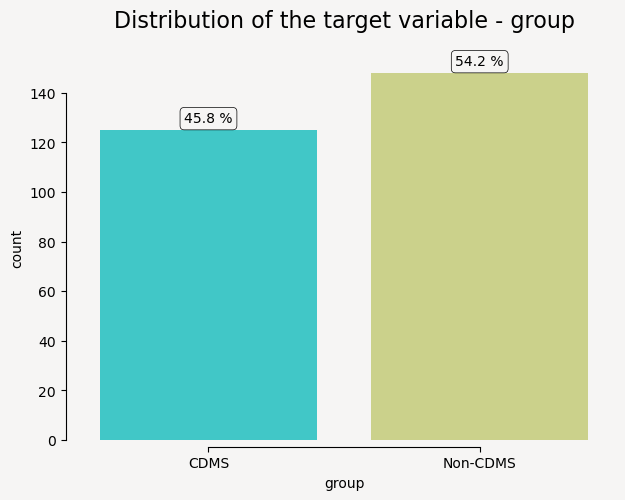

In [12]:
count_plot(data, 'group', 'Distribution of the target variable - group', hue=False)

In [13]:
data.groupby(['Gender', 'group'])['group'].count()

Gender  group   
Female  CDMS         61
        Non-CDMS    107
Male    CDMS         64
        Non-CDMS     41
Name: group, dtype: int64

In [14]:
print('Percent of male CDMS patients is {} %'.format(np.round((64/105*100),2)))

Percent of male CDMS patients is 60.95 %


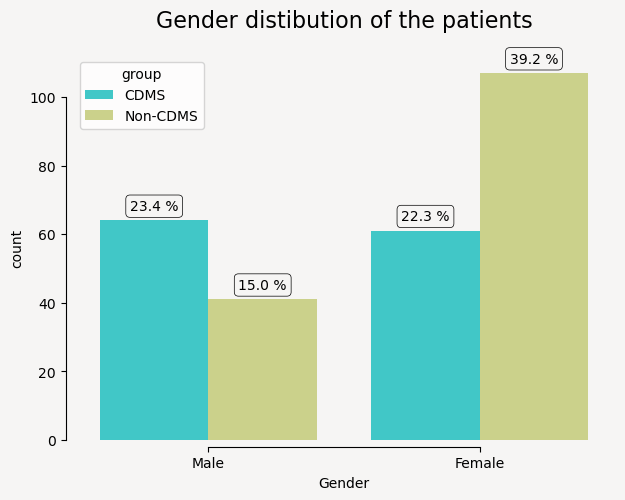

In [15]:
count_plot(data, 'Gender', 'Gender distibution of the patients', hue=True)

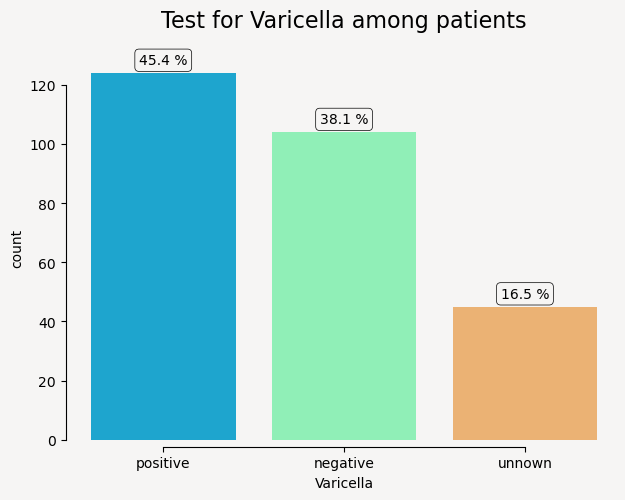

In [16]:
count_plot(data, 'Varicella', 'Test for Varicella among patients', hue=False)

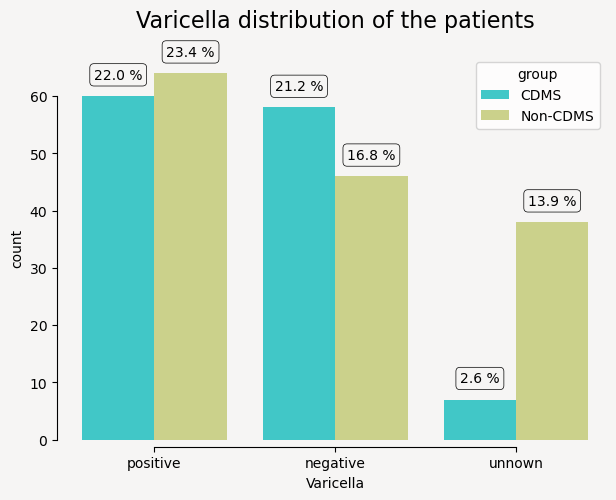

In [17]:
count_plot(data, 'Varicella', 'Varicella distribution of the patients', hue=True)

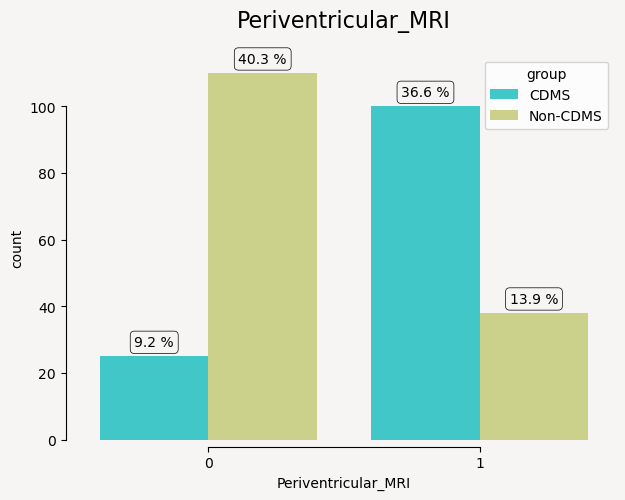

In [18]:
count_plot(data, 'Periventricular_MRI', 'Periventricular_MRI', hue=True)

In [19]:
data.groupby(['Periventricular_MRI'])['group'].value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').style.background_gradient(cmap='Blues')

In [20]:
data.groupby(['Infratentorial_MRI'])['group'].value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').style.background_gradient(cmap='Blues')

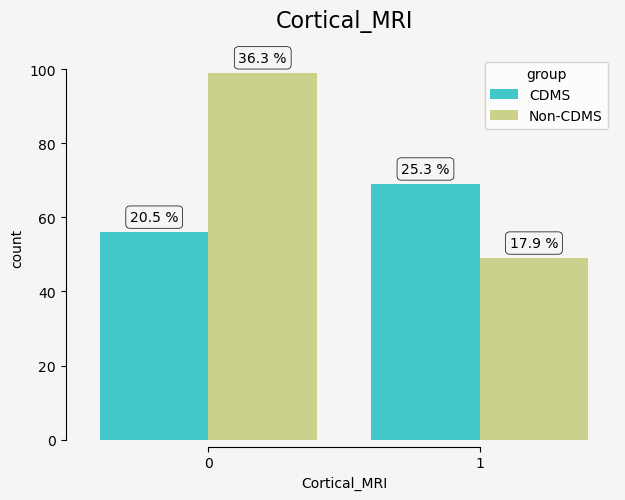

In [21]:
count_plot(data, 'Cortical_MRI', 'Cortical_MRI', hue=True)

In [22]:
data.groupby(['Cortical_MRI'])['group'].value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').style.background_gradient(cmap='Blues')

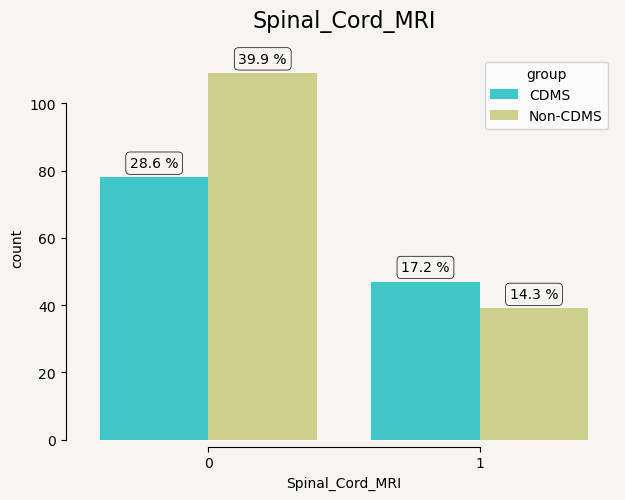

In [23]:
count_plot(data, 'Spinal_Cord_MRI', 'Spinal_Cord_MRI', hue=True)

In [24]:
data.groupby(['Spinal_Cord_MRI'])['group'].value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').style.background_gradient(cmap='Blues')

In [25]:
data.groupby(['Periventricular_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Cortical_MRI'])['group'].value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').style.background_gradient(cmap='Blues')

<AxesSubplot:title={'center':'Count/Barplot of all the MRI combinations'}, xlabel='Periventricular_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Cortical_MRI,group'>

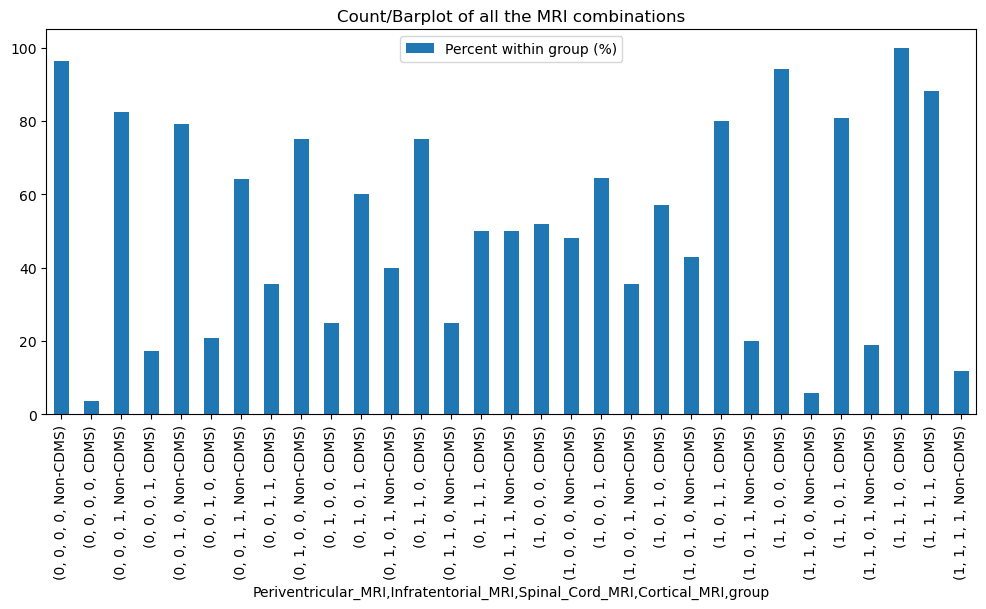

In [26]:
data.groupby(['Periventricular_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Cortical_MRI'])['group']\
.value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').plot(kind='bar', figsize=(12,5), title='Count/Barplot of all the MRI combinations')

Text(0.5, 1.05, 'Age distibution of patients')

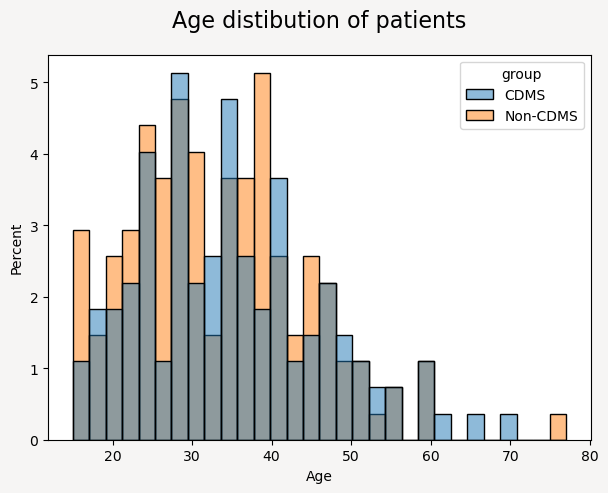

In [27]:
plt.figure(figsize=(7,5), facecolor='#F6F5F4')
ax= sns.histplot(data=data, x=data['Age'], hue='group', stat='percent', common_norm=True, bins=30)
ax.set_title('Age distibution of patients', fontsize=16, y=1.05)

In [28]:
data.Age.describe()

count    273.000000
mean      34.062271
std       11.114369
min       15.000000
25%       25.000000
50%       33.000000
75%       40.000000
max       77.000000
Name: Age, dtype: float64

Text(0.5, 1.05, "Pearson's corr heatmap")

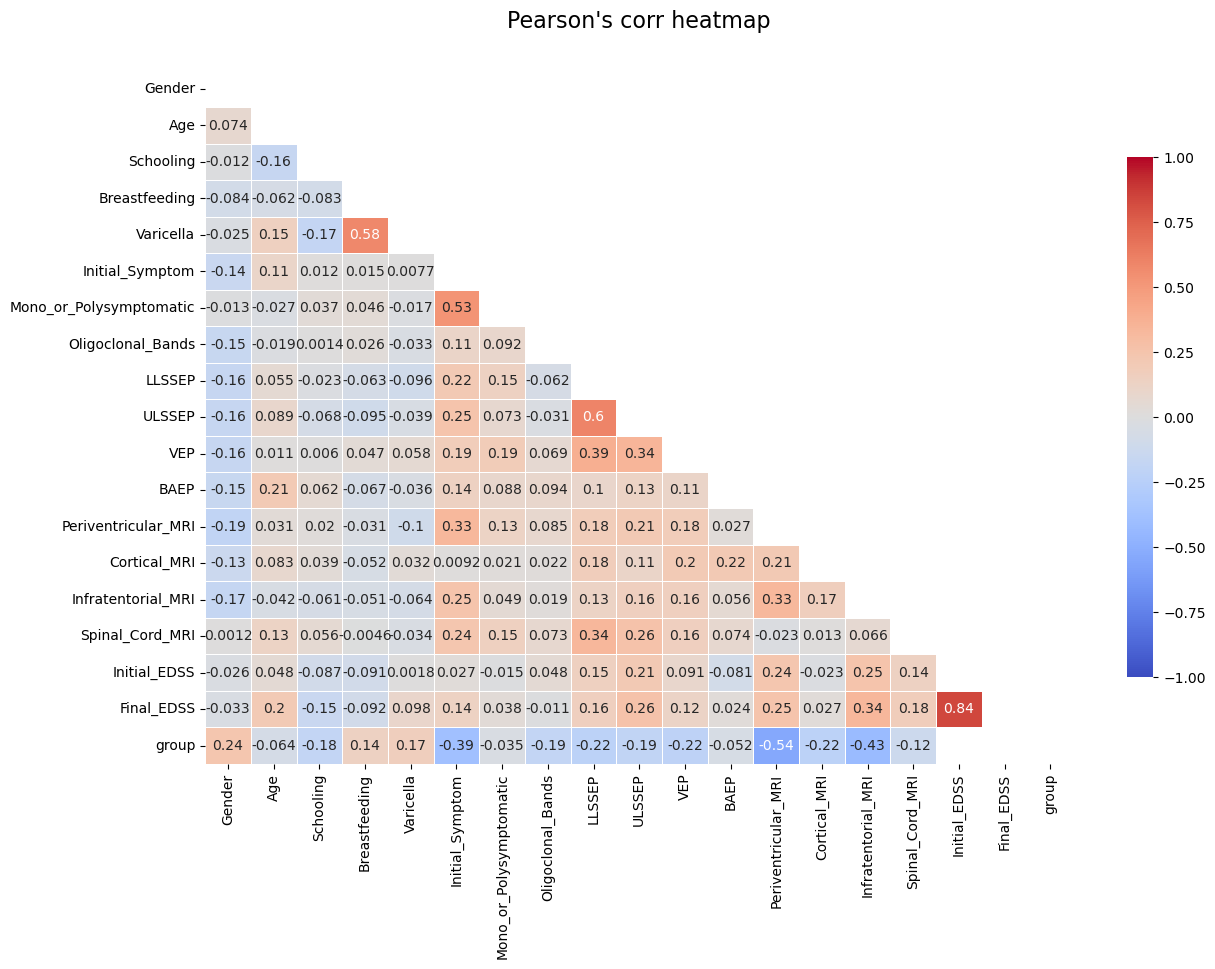

In [29]:
corr =  df.corr()
mask= np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(14,9), facecolor=None)
cmap=sns.color_palette('coolwarm', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True, square=False, linewidth=.5, cbar_kws={'shrink': 0.75})
ax.set_title("Pearson's corr heatmap", fontsize=16, y=1.05)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
#import shap

In [32]:
df.drop(['Initial_EDSS', 'Final_EDSS'], axis=1, inplace=True)
data['group'] = data['group'].map(group)

In [33]:
df = df.dropna()
df.isna().sum().sum()

0

In [34]:
print('Number of rows after dropping NA values is {}, which is {} % of the original data'.format((len(df)), np.round(len(df)/len(data)*100), 2))

Number of rows after dropping NA values is 271, which is 99.0 % of the original data


In [35]:
X = df.drop('group', axis=1)
y = df['group']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [ ]:
y_predict = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

In [ ]:
conf_mtrx = confusion_matrix(y_val, y_predict, labels=model.classes_)
disp_mtrx = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx, display_labels=model.classes_)
disp_mtrx.plot();